In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=0)

In [7]:
N, D = X_train.shape

In [8]:
# Scale the data
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Build the model
model = nn.Linear(D, 1)

In [12]:
# Loss and Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [13]:
# Convert data into Torch Tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [14]:
# TRAIN THE MODEL
n_epochs = 1000
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for i in range(n_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()
    
    # forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward and optimize
    loss.backward()
    optimizer.step()
    
    # GET TEST LOSS
    output_test = model(X_test)
    loss_test = criterion(output_test, y_test)
    
    # save
    train_losses[i] = loss.item()
    test_losses[i] = loss_test.item()
    
    if (i+1) % 50 == 0:
        print(f'Epoch {i+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.3733, Test Loss: 0.3900
Epoch 100/1000, Train Loss: 0.2851, Test Loss: 0.3044
Epoch 150/1000, Train Loss: 0.2348, Test Loss: 0.2556
Epoch 200/1000, Train Loss: 0.2021, Test Loss: 0.2232
Epoch 250/1000, Train Loss: 0.1791, Test Loss: 0.2000
Epoch 300/1000, Train Loss: 0.1622, Test Loss: 0.1824
Epoch 350/1000, Train Loss: 0.1492, Test Loss: 0.1686
Epoch 400/1000, Train Loss: 0.1390, Test Loss: 0.1575
Epoch 450/1000, Train Loss: 0.1307, Test Loss: 0.1484
Epoch 500/1000, Train Loss: 0.1239, Test Loss: 0.1408
Epoch 550/1000, Train Loss: 0.1182, Test Loss: 0.1342
Epoch 600/1000, Train Loss: 0.1133, Test Loss: 0.1286
Epoch 650/1000, Train Loss: 0.1091, Test Loss: 0.1238
Epoch 700/1000, Train Loss: 0.1054, Test Loss: 0.1195
Epoch 750/1000, Train Loss: 0.1022, Test Loss: 0.1157
Epoch 800/1000, Train Loss: 0.0993, Test Loss: 0.1124
Epoch 850/1000, Train Loss: 0.0967, Test Loss: 0.1094
Epoch 900/1000, Train Loss: 0.0944, Test Loss: 0.1067
Epoch 950/1000, Train Loss: 0

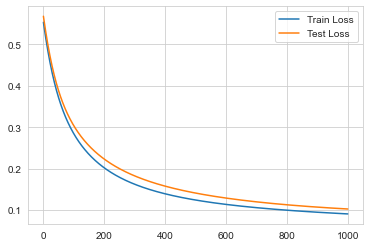

In [15]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()

In [16]:
# Checkick accuracy
with torch.no_grad():
    p_train = model(X_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(y_train.numpy() == p_train) * 100.0
    
    p_test = model(X_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(y_test.numpy() == p_test) * 100.0
print(f'Training accuracy: {train_acc:.4f}%, Test accuracy: {test_acc:.4f}%')

Training accuracy: 6.0367%, Test accuracy: 7.4468%
